# Relatório Parcial : Maratona de Filmes

Alunos: Bernardo Cunha Capoferri, Lívia Sayuri Makuta.



## Índice :
* [Objetivo do projeto](#first-bullet)
* [Heurística gulosa, aleatória e estratégias misturadas](#second-bullet)
* [Implementação e explicação da lógica utilizada no código](#third-bullet)
* [Considerações sobre o profiling](#fourth-bullet)
* [Comparação entre as heurísticas conforme muda o valor](#fifth-bullet)

# Objetivo do projeto <a class="anchor" id="first-bullet"></a>

O projeto parte do seguinte cenário: em um final de semana você quer assistir o máximo de filmes posssíveis. Entretanto, para que isso aconteça, existem algumas restrições de horário e de categorias. Isso implica nas seguintes situações: o usuário pode assistir apenas um filme durante um intervalo de tempo, e precisa atender a quantidade de filmes por categoria que são desejados. Isso em forma de dados equivaleria ao seguinte:

- Como entrada temos uma quantidade de filmes `n` inteiros disponíveis;
- Além disso, também temos uma quantidade `m` inteiros que representa o número máximo de filmes que podem ser assistidos em cada categoria (comédia, drama, ação, etc).
- Por fim, temos 'n' trios de inteiros que representam a hora de início, a hora de fim e a categoria do filmes: `H[i], F[i], C[i]`, respectivamente.


Dessa forma, o formato de dados de entrada seguiria o seguinte exemplo:

``` txt
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

Sendo nesse caso:

- `n = 10`, ou seja, existem 10 filmes disponíveis para serem assitidos.
- `m = 1, 3, 1, 2`, ou seja, podem ser assistidos: 1 filme para a categoria 1, 3 filmes para a categoria 2, 1 filme para a categoria 3 e 2 filmes para a categoria 4.
- `(H[1], F[1], C[1]) = (11, 13, 3); (H[2], F[2], C[2]) = (14, 15, 3)` e assim por diante. Ou seja, o filme 1 começa às 11h, termina às 13h e pertence a categoria 3, enquanto o filme 2 começa às 14, termina às 15h e pertence a categoria 3.

Logo, o objetivo do projeto é conseguir agrupar o máximo de filmes que podem ser assistidos em um dia e seguindo as restrições impostas. assim, como saída de dados nosso programa deve retornar: um inteiro que representa o número máximo dos filmes e os filmes que podem ser assistidos. Exemplo:

```txt
Foram vistos 2 filmes.
12 13 4
14 15 1
```

# Heurística gulosa, aleatória e estratégias misturadas <a class="anchor" id="second-bullet"></a>

Neste tópico será explicado como as heurísticas foram implementadas no nosso código em C++. Mas antes, importante ressaltar que todos os dados de entrada e arquivos no formato `.txt`foram gerados pelo código de exemplo passado pelo professor no site da disciplina: https://insper.github.io/supercomp/projetos/ .

## Heurística gulosa

Antes de explicar como essa heurística foi implementada, primeiro começaremos explicando seu conceito e como ela funciona. Dessa forma, tem-se que a ideia principal da heurística gulosa (Greedy) é tentar encontrar uma solução  global ótima. E para fazer isso, seguimos a seguinte abordagem:


1) Primeiro escolhemos uma solução inicial. No caso, escolhemos ordenar os filmes em ordem crescente do horário de fim. Depois, com eles ordenados, escolhemos ordenar novamente apenas aqueles filmes cujos horários de fim são os mesmos. E para esses, aplicamos uma ordenção crescente em relação ao horário de início.

2) Depois, aplicamos as restrições e escolhemos o primeiro filme que as atendia de acordo com os horários de fim que estão organizado de maneira crescente.

Logo, como pode ser visto, o objetivo da heurística gulosa é encontrar a solução ótima em um problema de otimização. No entanto, nem sempre é possível garantir que a solução encontrada seja a melhor possível, pois pode haver soluções melhores que não foram consideradas devido à abordagem local do algoritmo.

Apesar disso, a heurística gulosa é muito utilizada em problemas de otimização, especialmente quando o tamanho do problema é grande e não é possível encontrar a solução ótima de forma eficiente. Além disso, o algoritmo pode ser modificado e combinado com outras técnicas - como faremos posteriormente - para melhorar a qualidade da solução encontrada.

## Aleatorização

Por sua vez, também existe a estratégia de aleatorização para construir algoritmos de busca local. Essa estratégia pode ser usada de maneira isolada ou em conjunto com outra estratégia. No geral, ela consiste na introdução de um elemento de aleatoriedade em um algoritmo para aumentar a capacidade de exploração do espaço de soluções e evitar que o algoritmo fique preso em máximos locais. Como ele é aleatório, ele não é consistente, e pode ser que essa variação possa nem sempre resultar em boas soluções, mas mesmo assim é uma estratégia a ser considerada e principalmente para ser utilizada de maneira conjunta com alguma outra heurística.


## Heurística gulosa e aleatorização


Por fim, uma última estratégia foi utilizar tanto a heurística gulosa quanto a aleatorização de maneira conjunta. Conforme descrito no enunciado do projeto, a ideia era modificar a heurística gulosa de modo que para selecionar um filme para ser assistido, exista 25% de chance de fazê-lo usando aleatoriedade e 75% de utilizar a heurística gulosa - lembrando que em qualquer uma dessas estratégias deve se respeitar as restrições estabelecidas no início do projeto. Isso fará com que a heurística possa ter um pouco mais de "exploration" e os resultados podem ser melhores - evitando também que o código fique em uma solução que é um máximo local. 


# Implementação e explicação da lógica utilizada no código <a class="anchor" id="third-bullet"></a>


Neste tópico, explicaremos como a lógica do código foi implementada para cada estratégia de solução. No final, o código resultante implementa a heurística gulosa e a aleatoridade juntas seguindo a proporção de aproximadamente 25% de chance de selecionar um filme com a estratégia aleatória e 75% de chance de selecionar um filme com a estratégia gulosa.


### Implementação do código: tratamento e limpeza dos dados

O primeiro passo para começar a implementação do código, seja para a heurística gulosa ou seguindo a aleatorização, foi limpar os dados de entrada e prepará-los para serem utilizados. Dessa maneira, foi criada uma struct Filmes para organizar melhor cada dado de entrada que representa um filme no seguinte formato: H[i], F[i], C[i]. Assim, essa struct `Filmes` foi construída recebendo o horário de início, o horário de fim e a categoria do filme, como pode ser visto abaixo:

``` cpp

struct Filme{
    int inicio;
    int fim;
    int categoria;
};

```

Feito isso, foram criadas as variáveis referentes à quantidade de filmes e categorias, bem como um vetor em que cada índice continha a quantidade de filmes que poderiam ser assistidos para cada categoria. **Detalhe importante:** essa última definição vai implicar no fato de que a categoria não corresponde diretamente ao índice do vetor, isso porque o índice do vetor começa em 0, enquanto a categoria de filmes começa em 1, logo, toda vez que quisermos acessar o número de filmes por categoria, devemos consultar o vetor em relação a uma categoria, precisaremos subtrair 1. 


O código correspondente ao que foi descrito foi implementado da seguinte maneira:

``` cpp

int qtd_filmes, qtd_categorias;
cin >> qtd_filmes >> qtd_categorias;

vector<int> filmes_por_categoria(qtd_categorias, 0);

```

O código utilizou a função `cin`, que pertence a biblioteca *iostream*, e que recebe o dado de entrada do arquivo na ordem em que ele é lido, sendo assim, como os inputs começam com `n` (número de filmes disponíveis) e `m` (número de categorias disponíveis), primeiro foi preenchida uma variável que chamamos de `qtd_filmes` e depois outra variável que chamamos de `qtd_categorias`. 

Além disso, note que o vetor `filmes_por_categoria` foi preenchido com zeros, e isso porque nós temos a informação de seu tamanho - que é a quantidade de categorias. Isso é melhor do que usar a função `push_back()` por dois motivos:

- Quando `push_back()` é utilizado para adicionar novos elementos ao vetor, o compilador precisa alocar memória dinamicamente, e isso pode levar mais tempo - já que o sistema operacional precisa localizar um espaço livre de memória para conseguir alocar o elemento. Por sua vez, quando o vetor já é alocado com zeros desde o início, o compilador já aloca toda a memória de uma vez.

- Toda vez que o `push_back()` é chamado, uma chamada de função é feita, e isso em termos de tempo de execução pode ser caro - principalmente se muitos elementos forem adicionados ao vetor. Em contrapartida, se desde o início ele for preenchido com zeros, não há a necessidade de chamar a função `push_back()` repetidamente.


Com o vetor de filmes por categoria criado e já preenchido com zeros, o próximo passo foi substituir esses zeros com os dados de cada categoria. Mais uma vez, levando em consideração os dados de entrada e a sequência em que foram apresentados, foi utilizada a função `cin`, como pode ser visto abaixo:

``` cpp

for (int i = 0; i < qtd_categorias; i++){
    cin >> filmes_por_categoria[i];
}

```

Feito isso, para que o acesso a todos os dados de entrada fosse concluído, criamos uma variável chamada `vetor_filmes`, que é um vetor de `Filmes` (struct). Da mesma forma que o vetor `filmes_por_categoria`, o `vetor_filmes` também já foi inicializado com filmes cuja struct foi preenchida com {0, 0, 0}. O código referente pode ser visto abaixo:

```cpp

Filme filme_vazio = {0, 0, 0};
vector<Filme> vetor_filmes (qtd_filmes, filme_vazio);

```

Com o vetor de filmes criado, nós substituímos todas as structs zeradas pelos dados dos filmes lidos do arquivo de entrada. Além disso, também foi feita uma limpeza e manipulação nesses dados. Isso porque:

- Os filmes que iniciavam ou terminavam às 24h, tinham o valor como 0h. Obviamente, em termos de significado é a mesma coisa, mas para os próximos passos é melhor trocar esse valor para 24h.
- Havia filmes cujos horários de início e fim eram inválidos: negativos, logo foi preciso deletar esses dados.

Dessa forma, a implementação foi feita da seguinte maneira:


``` cpp
for (int i = 0; i < qtd_filmes; i++){
    Filme filme;
    cin >> filme.inicio >> filme.fim >> filme.categoria;
    if (filme.inicio == 0){
        filme.inicio = 24;
    }
    if (filme.fim == 0){
        filme.fim = 24;
    }
    if (filme.inicio < 0){
        continue;
    }
    if (filme.fim < 0){
        continue;
    }
    vetor_filmes[i] = filme;
}

```

Tendo todos os dados básicos para resolver o problema, agora podemos começar a implementar a lógica para resolvê-lo. A começar com a ordenação dos filmes de maneira crescente em relação ao seu horário de término - e não em relação ao seu horário de início. Isso porque, se formos percorrer o vetor de filmes sem essa ordenação, podemos acabar selecionando um filme que comece bem cedo mas que termine bem tarde, ou seja, seu horário de duração será muito grande e, consequentemente, a quantidade de filmes a ser assistido será menor. Assim, para fazer isso, utilizamos a função `sort()` da biblioteca *algorithm* que ordena um intervalo de elementos em ordem crescente ou descrente desde que possua um iterador de início e  outro de fim. 

Interessante destacar que o algoritmo de ordenação utilizado pela função `sort()` é geralmente o Quicksort ou o Mergesort (depende da implementação), e ambos os algoritmos têm um desempenho médio de O(n log n), ou seja, o tempo de execução cresce em proporção logartímica com o tamanho do vetor.

O código referente a essa ordenação pode ser visto abaixo:

```cpp


void ordena_final(vector<Filme> &vetor_filmes){
    std::sort(vetor_filmes.begin(), vetor_filmes.end(), [] (Filme &a, Filme &b){
		return a.fim < b.fim;
	});

}


ordena_final(vetor_filmes);

```

Com essa ordenação feita, notamos que muitos filmes terminavam nos mesmos horários de fim, entretanto estavam desordenados em relação à ordem de início. E como o objetivo é preencher todos os horários possíveis ao longo do dia, e os filmes já estavam ordenados em relação ao seu horário de término, decidimos ordenar esses filmes com o mesmo horário de término de maneira crescente em relação ao seu horário de início. Isso foi feito com o seguinte código:

```cpp
void ordena_inicio(vector<Filme> &vetor_filmes){
    // Se e somente se o vetor tiver dois horários finais iguais, o que vem primeiro vai ser o vetor com o horário inicial menor.
    for (int i = 0; i < int(vetor_filmes.size()); i++){
        if (vetor_filmes[i].fim == vetor_filmes[i+1].fim){
            if (vetor_filmes[i].inicio > vetor_filmes[i+1].inicio){
                Filme aux = vetor_filmes[i];
                vetor_filmes[i] = vetor_filmes[i+1];
                vetor_filmes[i+1] = aux;
            }
        }
    }
}

ordena_inicio(vetor_filmes);

```

Nessa segunda ordenação, temos que o vetor de filmes é percorrido novamente e caso o horário de término do filme atual - aquele que está sendo iterado - seja igual ao do próximo, conferimos se o horário de início do atual é maior que o do próximo. Caso seja, trocamos os dois de posição, e fazemos isso até o loop terminar.

Por fim, antes de implementar as estratégias, um último passo foi feito para que os dados estivessem finalmente prontos para ser utilizados. Isso porque como descrito anteriormente, precisamos selecionar um filme com 25% de chance de ser feito com a estratégia aleatória e 75% de chance com a heurística gulosa. E para cada estratégia, temos a seguinte lógica:
- A heurística gulosa vai selecionar o primeiro filme que encontrar dentro do intervalo de filmes que terminem em um mesmo horário e que atendam as restrições estabelecidas. 
- A aleatorização vai sortear um filme que atenda as restrições e que está dentro do intervalo de filmes que terminem em um mesmo horário.

E como essa lógica exige saber quais filmes terminam no mesmo horário, é viável construir um dicionário em que as chaves sejam os horários de término e que os valores dessas chaves sejam vetores dos filmes que terminam naquele horário. O dicionário foi criado da seguinte maneira:

``` cpp
map<int, vector<Filme>> myDict;

for (int i = 0; i < qtd_filmes; i++){
    myDict[vetor_filmes[i].fim].push_back(vetor_filmes[i]);
}
```

Com os dados preparados, podemos implementar essa estratégia de misturar as estratégias utilizando a distribuição binomial, que é aplicada em casos de experimentos repetidos - isto é, uma sequência fixa de tentativas independentes - para quando existem dois resultados: sucesso ou fracasso, de tal forma que cada tentativa tem uma probabilidade de sucesso constante. Assim, com essa distribuição será gerado um número aleatório que retorna 1 com 75% de probabilidade e 0 com 25% de probabilidade. 

Dessa forma, foi feito um loop que percorre 24 horas e que para cada horário irá chamar a função que aplica a heurística gulosa caso o sorteio retorne 1, e que chame a função que aplica a estratégia aleatória caso contrário.

O código que representa essa descrição pode ser visto abaixo:

```cpp

    unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
 	std::default_random_engine generator(seed); 	
	std::binomial_distribution<int> distribution(1, 0.75);
  
    for (int i = 1; i <= 24; i++){
        int sorteio = distribution(generator)*abs(rand()%2);
        if (horarios_disponiveis == mascara_horarios){
            break;
        }
        if (sorteio == 1){
            heuristica_gulosa(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos, qtd_filmes);
        } else
        {   
            aleatorizacao(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos);
        }
    }

```

Algumas variáveis ainda não foram descritas, mas serão explicadas nos próximos tópicos em que a lógica das estratégias será abordada.


### Implementação do código: heurística gulosa

Para implementar a heurística gulosa, já temos os dados organizados que facilitaram bastante o processo, pois agora basta acessar os filmes que estão na chave do dicionário e selecionar o primeiro que atende as restrições. 

Como visto no último bloco de código, a função `heuristica_gulosa` recebe as seguintes variáveis:

- myDict[i] : que retorna o vetor com todos os filmes que terminam no horário `i`;
- filmes_por_categoria: o vetor já descrito que possui a quantidade de filmes que podem ser assistidos em cada categoria.
- vetor_filmes_vistos: o vetor de filmes vistos que no final retornará todos os filmes que poderão ser vistos em um dia, ou seja, a solução final.
- filmes_vistos: o tamanho desse vetor `vetor_filmes_vistos`, que é o número de filmes que poderão ser vistos em um dia.
- horarios_disponiveis: um bitset de tamanho 24 que vai representar quais horários ainda estão disponíveis conforme o vetor `vetor_filmes_vistos` for preenchido.

Essas três últimas variáveis ainda não haviam aparecido no código, mas foram definidas para retornarem as soluções e para conferir os conflitos de horário. Sendo assim, foram definidas da seguinte maneira no código:

```cpp

    bitset<24> horarios_disponiveis;
    vector<Filme> vetor_filmes_vistos;
    int filmes_vistos = 0;
```

Essa variável `horarios_disponiveis` é do tipo bitset (da biblioteca *bitset*), que é um conjunto de bits que representa valores booleanos, de tal forma que cada elemento pode ser true (1) u false (0). Ele foi utilizado para otimizar as operações de conferência de conflito de horários, já que caso não fosse usado provavelmente teríamos que fazer várias checagems com o uso excessivo de condicionais. Dessa forma, basta utilizar um conjunto de 24 bits - que representa cada um dos horários - e ir preenchendo aos poucos com 1 os horários já ocupados. Por exemplo:


``` cpp
23  22  21  20  19  18  17  16  15  14  13  12  11  10   9   8   7   6   5   4   3   2   1   0   [índice]
1   1   0   0   0   0   1    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   [bitset]
24  23  22  21  20  19  18   17  16  15  14  13  12  11  10  9   8   7   6   5   4   3   2   1   [horários]
```

Nesse bitset, temos que os horários ocupados são: 16h - 17h e 22h - 1h. Note que:

- O índice dos horários vai de 0 até 23, enquanto na limpeza de horários trocamos para que as horas ficassem de 1h até 24h. Dessa forma, quando formos preencher o bitset com base nas horas de início e fim dos filmes, devemos preencher utilizando horário de início - 1 e horário de fim -1. Ou seja, se vamos preencher um filme que começa às 23h e termina às 2h, devemos preencher o índice 22, 23, 0 e 1. 

- Além disso, a única restrição do projeto era preencher o período de 24 horas assistindo um filme, logo, consideramos que esse tipo de situação: começar a assistir um filme às 23h e terminar às 2h do dia seguinte era aceitável, já que no dia seguinte ele poderia assistir filmes apenas a partir das 2h até às 22h.
 
Dito isso, para conferir conflito de horários, basta realizar a operação lógica `and` entre o bitset do horário que está sendo analisado com o bitset `horarios_disponiveis`. Caso o resultado seja 1, significa que há conflito de horários e que, portanto, esse horário analisado não pode ser incluído no bitset `horarios_disponiveis`. Por fim, basta conferir se a categoria do filme analisado ainda não foi totalmente preenchida. Assim, conforme os filmes forem preenchidos no `vetor_filmes_vistos`, o vetor `filmes_por_categoria` precisa ser atualizado, isto é, a categoria do filme que for preenchido precisa ser subtraída em 1. Com isso, caso sejam preenchidos todos os filmes daquela categoria, o valor no vetor para esta será de 0, indicando que filmes daquela categoria não podem mais ser acrescentados no `vetor_filmes_vistos`.

Com essa lógica, a função da heurística gulosa foi então implementada:

``` cpp 
void heuristica_gulosa(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){

    for (int i = 0; i <int(vetor_filmes.size()); i++){
        bitset<24> horario_analisado;
        preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
        if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
            filmes_vistos++;
            vetor_filmes_vistos.push_back(vetor_filmes[i]);
            filmes_por_categoria[vetor_filmes[i].categoria-1]--;
            preenche_bitset(horarios_disponiveis, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
            return;
        }
    }
}

```

Um último detalhe é essa função `preenche_bitset()` que, como o nome indica, preenche um bitset. Nesse caso, usamos ela para preencher os dois bitsets usados no código: o `horarios_disponiveis` e o `horario_analisado`. Ela foi construída de maneira a preencher os bitsets apenas utilizando o horário de início e fim dos filmes. Entretanto, vale lembrar que não bastou utilizar a função `set()` da biblioteca do biset, pois como podem existir casos em que o filme começa em um dia e termina em outro, é preciso tomar cuidado com essa rotatividade. Assim, o código implementado para essa função foi o seguinte:

``` cpp
void preenche_bitset(bitset<24> &horarios_disponiveis, int inicio, int fim){
    for (int i = 0; i < 24; i++){
        if (i >= inicio && i < fim){
            horarios_disponiveis.set(i);
        }
        else if (inicio > fim && (i >= inicio || i < fim)){// podemos assistir um filme das 23 as 1. Dessa forma, passamos assistindo às 23h e 24h inteiras. Mas não a 1h. 
            horarios_disponiveis.set(i);
        }
        else if(inicio == fim){
            horarios_disponiveis.set(inicio);
        }
    }
}
```

Nessa função, o loop for percorre todos os horários do dia (de 0 a 23) faz as seguintes conferências:

- Se o horário atual estiver entre inicio e fim (inclusive), a função set do objeto bitset é chamada para definir o bit correspondente a esse horário como 1.
- Se inicio for maior que fim, isso indica que o filme será assistido durante a transição de um dia para o outro (por exemplo, das 23h às 1h do dia seguinte), então a função também marca como disponível os horários entre inicio e 23 (incluso) e os horários entre 0 e fim (excluso). 
- Finalmente, se inicio for igual a fim, apenas o horário inicio é marcado como disponível.

Portanto, a função heurística percorre os filmes que estão na chave do dicionário - isto é, os filmes que terminam no mesmo horário -  e seleciona o primeiro que não conflita com os horários que já foram preenchidos e que pertence a uma categoria que ainda possui filmes disponíveis para ser preenchidos.

### Implementação do código: aleatorização


Por sua vez, como descrita anteriormente, a estratégia de aleatorização da função consiste em selecionar aleatoriamente um filme disponível em um determinado intervalo de horários, levando em consideração as categorias disponíveis e os filmes já vistos.

E, assim como feito na heurística gulosa, o bitset `horarios_disponiveis` será preenchido com os horários ocupados pelos filmes já vistos.  Para isso, o vetor de filmes será percorrido em busca de filmes que se encaixem nos horários disponíveis e nas categorias restantes. Assim, os filmes disponíveis serão armazenados em um vetor, e a partir desse vetor, um filme será selecionado aleatoriamente para ser assistido.

Essa estratégia foi implementada na função `aleatorizacao` que recebe mesmas variáveis que a função ha heurística gulosa e que pode ser vista abaixo:

``` cpp

void aleatorizacao(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
    vector<Filme> disponiveis_no_intervalo;
    if (int(vetor_filmes.size()) > 1) {
        for (int i = 1; i < int(vetor_filmes.size()); i++){
            bitset<24> horario_analisado;
            preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
            if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
                disponiveis_no_intervalo.push_back(vetor_filmes[i]);
            }  
        }

        int numero_aleatorio = 0;

        if (int(disponiveis_no_intervalo.size()) == 0){
            return;
        }
        if (disponiveis_no_intervalo.size() == 1){
            numero_aleatorio = 0;
        } else{
            int size_myDictItem = int(disponiveis_no_intervalo.size()-1);
            srand(time(NULL));
            numero_aleatorio = rand() % size_myDictItem+1;
        }

        filmes_vistos++;
        vetor_filmes_vistos.push_back(disponiveis_no_intervalo[numero_aleatorio]);
        filmes_por_categoria[disponiveis_no_intervalo[numero_aleatorio].categoria-1]--;
        preenche_bitset(horarios_disponiveis, disponiveis_no_intervalo[numero_aleatorio].inicio-1, disponiveis_no_intervalo[numero_aleatorio].fim-1);

    } 
    
}

```


A função começa verificando se existem mais de um filme no vetor de filmes que possuem o mesmo horário de término. Se não, ela retorna - já que nesse caso não existe nenhum filme que termine naquele horário, o que pode acontecer principalmente se a quantidade de dados de entrada for pequena. Em seguida, ela percorre esse vetor a partir do segundo elemento, preenche um bitset com o intervalo de horários ocupados pelo filme, e verifica se o filme está disponível nesse horário e se ainda existem filmes disponíveis na categoria do filme. Os filmes que satisfazem essas condições são armazenados em um vetor chamado `disponiveis_no_intervalo`.

Caso não haja filmes disponíveis no vetor `disponiveis_no_intervalo`, a função retorna. Caso contrário, um filme é selecionado aleatoriamente desse vetor. Além disso, se houver apenas um filme nesse vetor, ele é selecionado. Caso contrário, um número aleatório entre 1 e o tamanho do vetor menos um é gerado, e o filme correspondente é selecionado.

O filme selecionado é então adicionado ao vetor de filmes já vistos e o contador de filmes vistos é incrementado. O número de filmes restantes na categoria do filme selecionado é decrementado e o bitset de horários disponíveis é atualizado para incluir o horário ocupado pelo filme selecionado.


### Resultado retornado

Com toda a lógica implementada, basta retornar os filmes preenchidos no vetor `vetor_filmes_vistos` e a quantidade de vistos vistos que é a variável inteira `filmes_vistos`. Para fazer isso utilizamos a função `cout` da biblioteca *iostream*. 

O código que faz isso pode ser visto abaixo:

``` cpp

    cout << "Foram vistos " << filmes_vistos << " filmes." << endl;

    for (int i = 0; i < int(vetor_filmes_vistos.size()); i++){
        cout << vetor_filmes_vistos[i].inicio << " " << vetor_filmes_vistos[i].fim << " " << vetor_filmes_vistos[i].categoria << endl;
    }

```

Dessa forma, o programa deve retornar como saída os resultados nesse formato:

``` txt

Foram vistos 21 filmes.
22 1 58
1 2 47
2 3 24
3 4 89
4 5 34
5 6 22
6 7 90
7 8 39
8 9 100
9 10 46
11 11 52
12 12 24
13 13 62
14 14 92
15 15 59
16 16 68
17 17 80
18 18 67
19 19 15
20 20 40
21 21 69

```

Sendo que nesse exemplo foram vistos 21 filmes, e esses 21 filmes seguem o formato: horário de ínicio, horário de término e categoria. 

Com isso, para guardar o resultado no formato `.txt` basta rodar o executável do programa passando um arquivo texto de entrada e outro de saída. 

Um exemplo de como rodar o programa pode ser visto abaixo:

``` bash

g++ -Wall -O3 -g projeto.cpp -o projeto

```
Esse comando vau compilar o programa escrito em C++, que no caso chamamos de "projeto.cpp" e gerar um arquivo executável com o nome "projeto". Importante ressaltar que ele foi compilado com "-O3", que habilita otimizações de alto nível durante a compilação, o que pode melhorar o desempenho do programa.

Feito isso, basta executar o programa fornecendo um arquivo de entrada e outro para ser a saída com os resultados:

``` bash

./projeto < in-0.txt > output-0.txt

```

Nesse caso, foi passando um arquivo de entrada `.txt` que segue o formato das entradas descritas no início do relatório : in-0.txt, e outro de saída : output-0.txt que segue o formato mostrado anteriormente.


                           
https://www.inf.ufsc.br/~andre.zibetti/probabilidade/binomial.html 


# Considerações sobre o profiling <a class="anchor" id="fourth-bullet"></a>

Utilizando a ferramenta `valgrind` para analisar as chamadas de funções de nosso código, chamada de "profiling", podemos observar áreas de possível otimização de nosso código. No caso deste relatório, essa ferramenta será utilizada para comparar os três códigos e ver como as diferentes heurísticas impactam a perfomance do código como um todo. 

Abaixo encontram-se parte das saída no terminal após ter rodado os comandos que contem a quantidade de chamda de funções dos códigos fontes de cada heurística:
``` Bash
valgrind --tool=callgrind {INSIRA O PROGRAMA} < Inputs/in-0.txt

callgrind_annotate callgrind.out.{PID DO COMANDO DO VALGRIND} {CÓDIGO FONTE}
```
No comando o input `in-0.txt` é o arquivo de testes com 10 mil filmes.

Observando os dados abaixo, podemos observar que se a preocupação for minimizar ao máximo o número de chamadas no código, o ideal seria seguir apenas com a heurística gulosa, provavelmente devido a natureza da aleatorização que ao contrário da anterior tem que realizar mais ações para obter um horário válido.

## Projeto.cpp

``` bash
--------------------------------------------------------------------------------
Ir                  
--------------------------------------------------------------------------------
42,362,258 (100.0%)  PROGRAM TOTALS


--------------------------------------------------------------------------------
-- User-annotated source: projeto.cpp
--------------------------------------------------------------------------------
Ir               

-- line 24 ----------------------------------------
      .               int inicio;
      .               int fim;
      .               int categoria;
      .           };
      .           
      .           
      .           void ordena_final(vector<Filme> &vetor_filmes){
      .               std::sort(vetor_filmes.begin(), vetor_filmes.end(), [] (Filme &a, Filme &b){
135,141 ( 0.32%)  		return a.fim < b.fim;
      .           	});
      .           
      .           }
      .           
      1 ( 0.00%)  void ordena_inicio(vector<Filme> &vetor_filmes){
      .               // Se e somente se o vetor tiver dois horários finais iguais, o que vem primeiro vai ser o vetor com o horśrio inicial menor.
 30,006 ( 0.07%)      for (int i = 0; i < int(vetor_filmes.size()); i++){
 30,000 ( 0.07%)          if (vetor_filmes[i].fim == vetor_filmes[i+1].fim){
 59,856 ( 0.14%)              if (vetor_filmes[i].inicio > vetor_filmes[i+1].inicio){
  9,304 ( 0.02%)                  Filme aux = vetor_filmes[i];
 37,216 ( 0.09%)                  vetor_filmes[i] = vetor_filmes[i+1];
 18,608 ( 0.04%)                  vetor_filmes[i+1] = aux;
      .                       }
      .                   }
      .               }
      1 ( 0.00%)  }
      .           
 14,313 ( 0.03%)  void preenche_bitset(bitset<24> &horarios_disponiveis, int inicio, int fim){
375,793 ( 0.89%)      for (int i = 0; i < 24; i++){
390,952 ( 0.92%)          if (i >= inicio && i < fim){
      .                       horarios_disponiveis.set(i);
      .                   }
 54,052 ( 0.13%)          else if (inicio > fim && (i >= inicio || i < fim)){// podemos assistir um filme das 23 as 1. Dessa forma, passamos assistindo às 23h e 24h inteiras. Mas não a 1h. 
      .                       horarios_disponiveis.set(i);
      .                   }
      .                   else if(inicio == fim){
      .                       horarios_disponiveis.set(inicio);
      .                   }
      .               }
      .           }
      .           
    165 ( 0.00%)  void heuristica_gulosa(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
      .           
    702 ( 0.00%)      for (int i = 0; i <int(vetor_filmes.size()); i++){
    446 ( 0.00%)          bitset<24> horario_analisado;
  1,338 ( 0.00%)          preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
 39,327 ( 0.09%)  => projeto.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (223x)
    289 ( 0.00%)          if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
     22 ( 0.00%)              filmes_vistos++;
      .                       vetor_filmes_vistos.push_back(vetor_filmes[i]);
     44 ( 0.00%)              filmes_por_categoria[vetor_filmes[i].categoria-1]--;
    102 ( 0.00%)              preenche_bitset(horarios_disponiveis, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
  1,818 ( 0.00%)  => projeto.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (11x)
      .                       return;
      .                   }
      .               }
     77 ( 0.00%)  }
      .           
      .           
    165 ( 0.00%)  void aleatorizacao(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
      .               vector<Filme> disponiveis_no_intervalo;
     44 ( 0.00%)      if (int(vetor_filmes.size()) > 1) {
 18,148 ( 0.04%)          for (int i = 1; i < int(vetor_filmes.size()); i++){
  4,526 ( 0.01%)              bitset<24> horario_analisado;
 27,156 ( 0.06%)              preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
859,296 ( 2.03%)  => projeto.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (4,526x)
 10,118 ( 0.02%)              if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
      .                           disponiveis_no_intervalo.push_back(vetor_filmes[i]);
      .                       }  
      .                   }
      .           
      .                   int numero_aleatorio = 0;
      .           
     22 ( 0.00%)          if (int(disponiveis_no_intervalo.size()) == 0){
      .                       return;
      .                   }
     22 ( 0.00%)          if (disponiveis_no_intervalo.size() == 1){
      .                       numero_aleatorio = 0;
      .                   } else{
     11 ( 0.00%)              int size_myDictItem = int(disponiveis_no_intervalo.size()-1);
     44 ( 0.00%)              srand(time(NULL));
 75,328 ( 0.18%)  => ???:0x000000000010a2f0 (11x)
     88 ( 0.00%)  => ???:0x000000000010a2e0 (11x)
     44 ( 0.00%)              numero_aleatorio = rand() % size_myDictItem+1;
    660 ( 0.00%)  => ???:0x000000000010a230 (11x)
      .                   }
      .           
     22 ( 0.00%)          filmes_vistos++;
     11 ( 0.00%)          vetor_filmes_vistos.push_back(disponiveis_no_intervalo[numero_aleatorio]);
     44 ( 0.00%)          filmes_por_categoria[disponiveis_no_intervalo[numero_aleatorio].categoria-1]--;
     66 ( 0.00%)          preenche_bitset(horarios_disponiveis, disponiveis_no_intervalo[numero_aleatorio].inicio-1, disponiveis_no_intervalo[numero_aleatorio].fim-1);
  1,910 ( 0.00%)  => projeto.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (11x)
      .           
      .               } 
      .               
     77 ( 0.00%)  }
      .           
      .           
      .           
      .           
     11 ( 0.00%)  int main(){
      .               int qtd_filmes, qtd_categorias;
      7 ( 0.00%)      cin >> qtd_filmes >> qtd_categorias;
 10,061 ( 0.02%)  => ???:0x000000000010a260 (2x)
      .           
      1 ( 0.00%)      vector<int> filmes_por_categoria(qtd_categorias, 0);
      .               Filme filme_vazio = {0, 0, 0};
      1 ( 0.00%)      vector<Filme> vetor_filmes (qtd_filmes, filme_vazio);
      1 ( 0.00%)      bitset<24> horarios_disponiveis;
      .               bitset<24> mascara_horarios(0xFFFFFF);
      .               vector<Filme> vetor_filmes_vistos;
      1 ( 0.00%)      int filmes_vistos = 0;
      .           
    405 ( 0.00%)      for (int i = 0; i < qtd_categorias; i++){
    300 ( 0.00%)          cin >> filmes_por_categoria[i];
126,655 ( 0.30%)  => ???:0x000000000010a260 (100x)
      .               }
      .           
 40,006 ( 0.09%)      for (int i = 0; i < qtd_filmes; i++){
      .                   Filme filme;
 90,001 ( 0.21%)          cin >> filme.inicio >> filme.fim >> filme.categoria;
36,361,512 (85.83%)  => ???:0x000000000010a260 (30,000x)
 30,000 ( 0.07%)          if (filme.inicio == 0){
    422 ( 0.00%)              filme.inicio = 24;
      .                   }
 30,000 ( 0.07%)          if (filme.fim == 0){
    435 ( 0.00%)              filme.fim = 24;
      .                   }
 19,597 ( 0.05%)          if (filme.inicio < 0){
      .                       continue;
      .                   }
 19,130 ( 0.05%)          if (filme.fim < 0){
      .                       continue;
      .                   }
 40,000 ( 0.09%)          vetor_filmes[i] = filme;
      .               }
      .           
      .               ordena_final(vetor_filmes);
      2 ( 0.00%)      ordena_inicio(vetor_filmes);
184,998 ( 0.44%)  => projeto.cpp:ordena_inicio(std::vector<Filme, std::allocator<Filme> >&) (1x)
      .           
      .               map<int, vector<Filme>> myDict;
      .           
 69,286 ( 0.16%)      for (int i = 0; i < qtd_filmes; i++){
      .                   myDict[vetor_filmes[i].fim].push_back(vetor_filmes[i]);
      .               }
      .           
      1 ( 0.00%)      unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
    930 ( 0.00%)  => ???:0x000000000010a210 (1x)
      1 ( 0.00%)   	std::default_random_engine generator(seed); 	
      .           	std::binomial_distribution<int> distribution(1, 0.75);
      .             
    114 ( 0.00%)      for (int i = 1; i <= 24; i++){
    230 ( 0.00%)          int sorteio = distribution(generator)*abs(rand()%2);
  1,380 ( 0.00%)  => ???:0x000000000010a230 (23x)
     46 ( 0.00%)          if (horarios_disponiveis == mascara_horarios){
      .                       break;
      .                   }
     44 ( 0.00%)          if (sorteio == 1){
     66 ( 0.00%)              heuristica_gulosa(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos);
 47,292 ( 0.11%)  => projeto.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<int, std::allocator<int> >&, std::bitset<24ul>&, std::vector<Filme, std::allocator<Filme> >&, int&) (11x)
      .                   } else
      .                   {   
     67 ( 0.00%)              aleatorizacao(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos);
1,063,441 ( 2.51%)  => projeto.cpp:aleatorizacao(std::vector<Filme, std::allocator<Filme> >&, std::vector<int, std::allocator<int> >&, std::bitset<24ul>&, std::vector<Filme, std::allocator<Filme> >&, int&) (11x)
      .                   }
      .               }
      .              
      6 ( 0.00%)      cout << "Foram vistos " << filmes_vistos << " filmes." << endl;
  5,086 ( 0.01%)  => ???:0x000000000010a3a0 (1x)
      .           
     70 ( 0.00%)      for (int i = 0; i < int(vetor_filmes_vistos.size()); i++){
    264 ( 0.00%)          cout << vetor_filmes_vistos[i].inicio << " " << vetor_filmes_vistos[i].fim << " " << vetor_filmes_vistos[i].categoria << endl;
 27,345 ( 0.06%)  => ???:0x000000000010a3a0 (66x)
      .               }
      .           
      .           
      .               return filmes_vistos;
     15 ( 0.00%)  }


```

## Gulosa.cpp

``` bash
--------------------------------------------------------------------------------
Ir                  
--------------------------------------------------------------------------------
41,385,335 (100.0%)  PROGRAM TOTALS


--------------------------------------------------------------------------------
-- User-annotated source: gulosa.cpp
--------------------------------------------------------------------------------
Ir               

-- line 24 ----------------------------------------
      .               int inicio;
      .               int fim;
      .               int categoria;
      .           };
      .           
      .           
      .           void ordena_final(vector<Filme> &vetor_filmes){
      .               std::sort(vetor_filmes.begin(), vetor_filmes.end(), [] (Filme &a, Filme &b){
135,141 ( 0.33%)  		return a.fim < b.fim;
      .           	});
      .           
      .           }
      .           
      1 ( 0.00%)  void ordena_inicio(vector<Filme> &vetor_filmes){
      .               // Se e somente se o vetor tiver dois horários finais iguais, o que vem primeiro vai ser o vetor com o horśrio inicial menor.
 30,006 ( 0.07%)      for (int i = 0; i < int(vetor_filmes.size()); i++){
 30,000 ( 0.07%)          if (vetor_filmes[i].fim == vetor_filmes[i+1].fim){
 59,856 ( 0.14%)              if (vetor_filmes[i].inicio > vetor_filmes[i+1].inicio){
  9,304 ( 0.02%)                  Filme aux = vetor_filmes[i];
 37,216 ( 0.09%)                  vetor_filmes[i] = vetor_filmes[i+1];
 18,608 ( 0.04%)                  vetor_filmes[i+1] = aux;
      .                       }
      .                   }
      .               }
      1 ( 0.00%)  }
      .           
  1,314 ( 0.00%)  void preenche_bitset(bitset<24> &horarios_disponiveis, int inicio, int fim){
 34,560 ( 0.08%)      for (int i = 0; i < 24; i++){
 35,582 ( 0.09%)          if (i >= inicio && i < fim){
      .                       horarios_disponiveis.set(i);
      .                   }
  1,902 ( 0.00%)          else if (inicio > fim && (i >= inicio || i < fim)){// podemos assistir um filme das 23 as 1. Dessa forma, passamos assistindo às 23h e 24h inteiras. Mas não a 1h. 
      .                       horarios_disponiveis.set(i);
      .                   }
      .                   else if(inicio == fim){
      .                       horarios_disponiveis.set(inicio);
      .                   }
      .               }
      .           }
      .           
    315 ( 0.00%)  void heuristica_gulosa(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
      .           
  1,314 ( 0.00%)      for (int i = 0; i <int(vetor_filmes.size()); i++){
    834 ( 0.00%)          bitset<24> horario_analisado;
  2,502 ( 0.01%)          preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
 75,787 ( 0.18%)  => gulosa.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (417x)
    543 ( 0.00%)          if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
     42 ( 0.00%)              filmes_vistos++;
      .                       vetor_filmes_vistos.push_back(vetor_filmes[i]);
     84 ( 0.00%)              filmes_por_categoria[vetor_filmes[i].categoria-1]--;
    195 ( 0.00%)              preenche_bitset(horarios_disponiveis, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
  3,586 ( 0.01%)  => gulosa.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (21x)
      .                       return;
      .                   }
      .               }
    147 ( 0.00%)  }
      .           
      .           
      .           void aleatorizacao(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
      .               vector<Filme> disponiveis_no_intervalo;
      .               if (int(vetor_filmes.size()) > 1) {
      .                   for (int i = 1; i < int(vetor_filmes.size()); i++){
      .                       bitset<24> horario_analisado;
      .                       preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
-- line 85 ----------------------------------------
-- line 108 ----------------------------------------
      .           
      .               } 
      .               
      .           }
      .           
      .           
      .           
      .           
     11 ( 0.00%)  int main(){
      .               int qtd_filmes, qtd_categorias;
      7 ( 0.00%)      cin >> qtd_filmes >> qtd_categorias;
  9,929 ( 0.02%)  => ???:0x0000000000109210 (2x)
      .           
      1 ( 0.00%)      vector<int> filmes_por_categoria(qtd_categorias, 0);
      .               Filme filme_vazio = {0, 0, 0};
      1 ( 0.00%)      vector<Filme> vetor_filmes (qtd_filmes, filme_vazio);
      1 ( 0.00%)      bitset<24> horarios_disponiveis;
      .               bitset<24> mascara_horarios(0xFFFFFF);
      .               vector<Filme> vetor_filmes_vistos;
      1 ( 0.00%)      int filmes_vistos = 0;
      .           
    405 ( 0.00%)      for (int i = 0; i < qtd_categorias; i++){
    300 ( 0.00%)          cin >> filmes_por_categoria[i];
126,655 ( 0.31%)  => ???:0x0000000000109210 (100x)
      .               }
      .           
 40,006 ( 0.10%)      for (int i = 0; i < qtd_filmes; i++){
      .                   Filme filme;
100,002 ( 0.24%)          cin >> filme.inicio >> filme.fim >> filme.categoria;
36,361,512 (87.86%)  => ???:0x0000000000109210 (30,000x)
 30,000 ( 0.07%)          if (filme.inicio == 0){
    422 ( 0.00%)              filme.inicio = 24;
      .                   }
 30,000 ( 0.07%)          if (filme.fim == 0){
    435 ( 0.00%)              filme.fim = 24;
      .                   }
 19,597 ( 0.05%)          if (filme.inicio < 0){
      .                       continue;
      .                   }
 19,130 ( 0.05%)          if (filme.fim < 0){
      .                       continue;
      .                   }
 40,000 ( 0.10%)          vetor_filmes[i] = filme;
      .               }
      .           
      .               ordena_final(vetor_filmes);
      2 ( 0.00%)      ordena_inicio(vetor_filmes);
184,998 ( 0.45%)  => gulosa.cpp:ordena_inicio(std::vector<Filme, std::allocator<Filme> >&) (1x)
      .           
      .               map<int, vector<Filme>> myDict;
      .           
 40,007 ( 0.10%)      for (int i = 0; i < qtd_filmes; i++){
      .                   myDict[vetor_filmes[i].fim].push_back(vetor_filmes[i]);
      .               }
      .           
      .               
    107 ( 0.00%)      for (int i = 1; i <= 24; i++){
     62 ( 0.00%)          if (horarios_disponiveis == mascara_horarios){
      .                       break;
      .                   }
    126 ( 0.00%)          heuristica_gulosa(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos);
 90,848 ( 0.22%)  => gulosa.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<int, std::allocator<int> >&, std::bitset<24ul>&, std::vector<Filme, std::allocator<Filme> >&, int&) (21x)
      .               }
      .              
      6 ( 0.00%)      cout << "Foram vistos " << filmes_vistos << " filmes." << endl;
  5,042 ( 0.01%)  => ???:0x0000000000109320 (1x)
      .           
     67 ( 0.00%)      for (int i = 0; i < int(vetor_filmes_vistos.size()); i++){
    252 ( 0.00%)          cout << vetor_filmes_vistos[i].inicio << " " << vetor_filmes_vistos[i].fim << " " << vetor_filmes_vistos[i].categoria << endl;
 26,082 ( 0.06%)  => ???:0x0000000000109320 (63x)
      .               }
      .           
      .           
      .               return filmes_vistos;
     15 ( 0.00%)  }
```

## Aleatorização

````Bash
--------------------------------------------------------------------------------
Ir                  
--------------------------------------------------------------------------------
43,278,422 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
-- User-annotated source: aleatorizacao.cpp
--------------------------------------------------------------------------------
Ir               

-- line 24 ----------------------------------------
      .               int inicio;
      .               int fim;
      .               int categoria;
      .           };
      .           
      .           
      .           void ordena_final(vector<Filme> &vetor_filmes){
      .               std::sort(vetor_filmes.begin(), vetor_filmes.end(), [] (Filme &a, Filme &b){
135,141 ( 0.31%)  		return a.fim < b.fim;
      .           	});
      .           
      .           }
      .           
      1 ( 0.00%)  void ordena_inicio(vector<Filme> &vetor_filmes){
      .               // Se e somente se o vetor tiver dois horários finais iguais, o que vem primeiro vai ser o vetor com o horśrio inicial menor.
 30,006 ( 0.07%)      for (int i = 0; i < int(vetor_filmes.size()); i++){
 30,000 ( 0.07%)          if (vetor_filmes[i].fim == vetor_filmes[i+1].fim){
 59,856 ( 0.14%)              if (vetor_filmes[i].inicio > vetor_filmes[i+1].inicio){
  9,304 ( 0.02%)                  Filme aux = vetor_filmes[i];
 37,216 ( 0.09%)                  vetor_filmes[i] = vetor_filmes[i+1];
 18,608 ( 0.04%)                  vetor_filmes[i+1] = aux;
      .                       }
      .                   }
      .               }
      1 ( 0.00%)  }
      .           
 26,121 ( 0.06%)  void preenche_bitset(bitset<24> &horarios_disponiveis, int inicio, int fim){
686,590 ( 1.59%)      for (int i = 0; i < 24; i++){
711,600 ( 1.64%)          if (i >= inicio && i < fim){
      .                       horarios_disponiveis.set(i);
      .                   }
 60,349 ( 0.14%)          else if (inicio > fim && (i >= inicio || i < fim)){// podemos assistir um filme das 23 as 1. Dessa forma, passamos assistindo às 23h e 24h inteiras. Mas não a 1h. 
      .                       horarios_disponiveis.set(i);
      .                   }
      .                   else if(inicio == fim){
      .                       horarios_disponiveis.set(inicio);
      .                   }
      .               }
      .           }
      .           
-- line 63 ----------------------------------------
-- line 72 ----------------------------------------
      .                       filmes_por_categoria[vetor_filmes[i].categoria-1]--;
      .                       preenche_bitset(horarios_disponiveis, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
      .                       return;
      .                   }
      .               }
      .           }
      .           
      .           
    315 ( 0.00%)  void aleatorizacao(vector<Filme> &vetor_filmes, vector<int> &filmes_por_categoria, bitset<24> &horarios_disponiveis, vector<Filme> &vetor_filmes_vistos, int &filmes_vistos){
      .               vector<Filme> disponiveis_no_intervalo;
     84 ( 0.00%)      if (int(vetor_filmes.size()) > 1) {
 34,828 ( 0.08%)          for (int i = 1; i < int(vetor_filmes.size()); i++){
  8,686 ( 0.02%)              bitset<24> horario_analisado;
 52,116 ( 0.12%)              preenche_bitset(horario_analisado, vetor_filmes[i].inicio-1, vetor_filmes[i].fim-1);
1,604,013 ( 3.71%)  => aleatorizacao.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (8,686x)
 16,790 ( 0.04%)              if ((!(horarios_disponiveis & horario_analisado).any()) && (filmes_por_categoria[vetor_filmes[i].categoria-1] > 0)){   // Retorna true se algum dos bits do bitset for 1
      .                           disponiveis_no_intervalo.push_back(vetor_filmes[i]);
      .                       }  
      .                   }
      .           
      .                   int numero_aleatorio = 0;
      .           
     42 ( 0.00%)          if (int(disponiveis_no_intervalo.size()) == 0){
      .                       return;
      .                   }
     42 ( 0.00%)          if (disponiveis_no_intervalo.size() == 1){
      .                       numero_aleatorio = 0;
      .                   } else{
     21 ( 0.00%)              int size_myDictItem = int(disponiveis_no_intervalo.size()-1);
     84 ( 0.00%)              srand(time(NULL));
143,808 ( 0.33%)  => ???:0x0000000000109270 (21x)
    168 ( 0.00%)  => ???:0x0000000000109260 (21x)
     84 ( 0.00%)              numero_aleatorio = rand() % size_myDictItem+1;
  1,260 ( 0.00%)  => ???:0x00000000001091e0 (21x)
      .                   }
      .           
     42 ( 0.00%)          filmes_vistos++;
     21 ( 0.00%)          vetor_filmes_vistos.push_back(disponiveis_no_intervalo[numero_aleatorio]);
     84 ( 0.00%)          filmes_por_categoria[disponiveis_no_intervalo[numero_aleatorio].categoria-1]--;
    126 ( 0.00%)          preenche_bitset(horarios_disponiveis, disponiveis_no_intervalo[numero_aleatorio].inicio-1, disponiveis_no_intervalo[numero_aleatorio].fim-1);
  3,586 ( 0.01%)  => aleatorizacao.cpp:preenche_bitset(std::bitset<24ul>&, int, int) (21x)
      .           
      .               } 
      .               
    147 ( 0.00%)  }
      .           
      .           
      .           
      .           
     11 ( 0.00%)  int main(){
      .               int qtd_filmes, qtd_categorias;
      7 ( 0.00%)      cin >> qtd_filmes >> qtd_categorias;
  9,929 ( 0.02%)  => ???:0x0000000000109210 (2x)
      .           
      1 ( 0.00%)      vector<int> filmes_por_categoria(qtd_categorias, 0);
      .               Filme filme_vazio = {0, 0, 0};
      1 ( 0.00%)      vector<Filme> vetor_filmes (qtd_filmes, filme_vazio);
      1 ( 0.00%)      bitset<24> horarios_disponiveis;
      .               bitset<24> mascara_horarios(0xFFFFFF);
      .               vector<Filme> vetor_filmes_vistos;
      1 ( 0.00%)      int filmes_vistos = 0;
      .           
    405 ( 0.00%)      for (int i = 0; i < qtd_categorias; i++){
    300 ( 0.00%)          cin >> filmes_por_categoria[i];
126,655 ( 0.29%)  => ???:0x0000000000109210 (100x)
      .               }
      .           
 40,006 ( 0.09%)      for (int i = 0; i < qtd_filmes; i++){
      .                   Filme filme;
100,002 ( 0.23%)          cin >> filme.inicio >> filme.fim >> filme.categoria;
36,361,512 (84.02%)  => ???:0x0000000000109210 (30,000x)
 30,000 ( 0.07%)          if (filme.inicio == 0){
    422 ( 0.00%)              filme.inicio = 24;
      .                   }
 30,000 ( 0.07%)          if (filme.fim == 0){
    435 ( 0.00%)              filme.fim = 24;
      .                   }
 19,597 ( 0.05%)          if (filme.inicio < 0){
      .                       continue;
      .                   }
 19,130 ( 0.04%)          if (filme.fim < 0){
      .                       continue;
      .                   }
 40,000 ( 0.09%)          vetor_filmes[i] = filme;
      .               }
      .           
      .               ordena_final(vetor_filmes);
      2 ( 0.00%)      ordena_inicio(vetor_filmes);
184,998 ( 0.43%)  => aleatorizacao.cpp:ordena_inicio(std::vector<Filme, std::allocator<Filme> >&) (1x)
      .           
      .               map<int, vector<Filme>> myDict;
      .           
 40,007 ( 0.09%)      for (int i = 0; i < qtd_filmes; i++){
      .                   myDict[vetor_filmes[i].fim].push_back(vetor_filmes[i]);
      .               }
      .           
      .               
    107 ( 0.00%)      for (int i = 1; i <= 24; i++){
     62 ( 0.00%)          if (horarios_disponiveis == mascara_horarios){
      .                       break;
      .                   }
    126 ( 0.00%)          aleatorizacao(myDict[i], filmes_por_categoria, horarios_disponiveis, vetor_filmes_vistos, filmes_vistos);
1,986,292 ( 4.59%)  => aleatorizacao.cpp:aleatorizacao(std::vector<Filme, std::allocator<Filme> >&, std::vector<int, std::allocator<int> >&, std::bitset<24ul>&, std::vector<Filme, std::allocator<Filme> >&, int&) (21x)
      .               }
      .              
      6 ( 0.00%)      cout << "Foram vistos " << filmes_vistos << " filmes." << endl;
  5,042 ( 0.01%)  => ???:0x0000000000109320 (1x)
      .           
     67 ( 0.00%)      for (int i = 0; i < int(vetor_filmes_vistos.size()); i++){
    252 ( 0.00%)          cout << vetor_filmes_vistos[i].inicio << " " << vetor_filmes_vistos[i].fim << " " << vetor_filmes_vistos[i].categoria << endl;
 26,082 ( 0.06%)  => ???:0x0000000000109320 (63x)
      .               }
      .           
      .           
      .               return filmes_vistos;
     15 ( 0.00%)  }

```

# Comparação entre as heurísticas conforme muda o valor <a class="anchor" id="fifth-bullet"></a>

Para comparar as heurísticas entre si, geramos 3 executáveis: o executável do projeto (que contém as duas heurísticas sendo utilizadas em conjunto), o executável `gulosa` (que utiliza apenas a heurística gulosa) e o executável `aleatorizacao` (que utiliza apenas a estratégia de aleatorização).

Com isso, testamos esses programas com os seguintes tamanhos de entrada: 10.000, 100.000, 1.000.000, 10.000.000, 100.000.000 e sempre utilizando 100 categorias. Essas estradas correspondem aos seguintes arquivos, repectivamente, `in-0.txt`, `in-1.txt`, `in-2.txt`, `in-3.txt` e `in-4.txt`


Os resultados e o código para essa comparação de desempenho podem ser vistos a seguir.

### Importando bibliotecas para benchmarking

In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Funções para auxiliar nas análises dos códigos.

In [2]:
def get_films_in_knapsack(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[2])

#convert dictionary to dataframe
def dict_to_df(dict):
    df = pd.DataFrame.from_dict(dict, orient='index')
    df = df.rename(index={0:'dez mil', 1:'cem mil', 2:'um milhão', 3:'dez milhões', 4:'cem milhões'})
    return df

### Informações Importantes

Para benchmarking foram utilizados 5 arquivos, com o menor possuindo 10 mil filmes e o maior possuindo 100 milhões, seus índices são os seguintes:

* 0 : 10 mil
* 1 : 100 mil
* 2 : 1 milhão
* 3 : 10 milhões
* 4 : 100 milões

## Benchmark da heurística gulosa

### Compilando o código
``` bash
g++ -Wall -O3 -g gulosa.cpp -o gulosa
```

### Como executar o arquivo compilado
``` bash
./gulosa < {Inserir Input}
```

### Realizando o benchmark

In [3]:
runtime_dict_guloso = {0: [], 1: [], 2: [], 3: [], 4: []}
films_in_knapsack_guloso = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(0, 10):
    for j in range(0, 5):
        start_time = time.time()
        !./gulosa < Inputs/in-{j}.txt > Outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict_guloso[j].append(runtime)
        films_in_knapsack_guloso[j].append(get_films_in_knapsack(f'Outputs/out-{j}.txt'))

In [4]:
runtime_pd_guloso = dict_to_df(runtime_dict_guloso)
runtime_pd_guloso['mean'] = runtime_pd_guloso.mean(axis=1)
runtime_pd_guloso.to_csv('Outputs/gulosa_runtime.csv', index=False)
films_in_knapsack_pd_guloso = dict_to_df(films_in_knapsack_guloso)
films_in_knapsack_pd_guloso['mean'] = films_in_knapsack_pd_guloso.mean(axis=1)
films_in_knapsack_pd_guloso.to_csv('Outputs/gulosa_films_in_knapsack.csv', index=False)

In [5]:
runtime_pd_guloso

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,0.115713,0.135512,0.121925,0.138169,0.122579,0.123018,0.122037,0.122838,0.123010,0.122525,0.124732
cem mil,0.141129,0.156854,0.132221,0.148771,0.147532,0.149432,0.147653,0.142067,0.141043,0.141385,0.144809
um milhão,0.383417,0.375073,0.358154,0.363330,0.357533,0.369424,0.368365,0.357881,0.360450,0.355642,0.364927
dez milhões,2.649284,2.562796,2.584533,2.420026,2.412206,2.427001,2.428975,2.428626,2.414440,2.500507,2.482839
cem milhões,24.455998,24.567748,23.304929,23.220544,23.197737,23.218705,23.345095,23.170281,23.197393,24.029987,23.570842


In [6]:
films_in_knapsack_pd_guloso

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,21,21,21,21,21,21,21,21,21,21,21.0
cem mil,22,22,22,22,22,22,22,22,22,22,22.0
um milhão,19,19,19,19,19,19,19,19,19,19,19.0
dez milhões,21,21,21,21,21,21,21,21,21,21,21.0
cem milhões,22,22,22,22,22,22,22,22,22,22,22.0


## Benchmark da heurística aleatorizada

### Compilando o código
``` bash
g++ -Wall -O3 -g aleatorizada.cpp -o aleatorizada
```

### Como executar o arquivo compilado
``` bash
./aleatorizacao < {Inserir Input}
```

### Realizando o benchmark

In [7]:
runtime_dict_aleatorizacao = {0: [], 1: [], 2: [], 3: [], 4: []}
films_in_knapsack_aleatorizacao = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(0, 10):
    for j in range(0, 5):
        start_time = time.time()
        !./aleatorizacao < Inputs/in-{j}.txt > Outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict_aleatorizacao[j].append(runtime)
        films_in_knapsack_aleatorizacao[j].append(get_films_in_knapsack(f'Outputs/out-{j}.txt'))

In [8]:
runtime_pd_aleatorizacao = dict_to_df(runtime_dict_aleatorizacao)
runtime_pd_aleatorizacao['mean'] = runtime_pd_aleatorizacao.mean(axis=1)
runtime_pd_aleatorizacao.to_csv('Outputs/aleatorizada_runtime.csv', index=False)
films_in_knapsack_pd_aleatorizacao = dict_to_df(films_in_knapsack_aleatorizacao)
films_in_knapsack_pd_aleatorizacao['mean'] = films_in_knapsack_pd_aleatorizacao.mean(axis=1)
films_in_knapsack_pd_aleatorizacao.to_csv('Outputs/aleatorizada_films_in_knapsack.csv', index=False)

In [9]:
runtime_pd_aleatorizacao

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,0.114722,0.138829,0.122032,0.141657,0.122078,0.139824,0.127447,0.129513,0.128009,0.133207,0.129732
cem mil,0.147722,0.133787,0.145943,0.155055,0.147093,0.139861,0.164720,0.167031,0.152849,0.168213,0.152227
um milhão,0.371815,0.369100,0.377876,0.385351,0.382679,0.380053,0.394636,0.405362,0.397149,0.385265,0.384928
dez milhões,2.645123,2.678236,2.621074,2.650546,2.678869,2.803185,2.698486,2.734996,2.695370,2.717231,2.692312
cem milhões,26.012905,25.931443,25.206357,25.969946,26.085859,26.525486,25.327858,26.031793,25.876069,26.296836,25.926455


In [10]:
films_in_knapsack_pd_aleatorizacao

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,23,20,22,22,20,21,21,23,22,20,21.4
cem mil,23,22,21,21,19,22,21,21,21,22,21.3
um milhão,22,23,19,21,20,21,21,21,20,21,20.9
dez milhões,20,23,21,21,21,19,21,22,22,21,21.1
cem milhões,21,20,22,21,23,22,21,21,21,22,21.4


## Benchmark da heurística gulosa com aleatorização

### Compilando o código
``` bash
g++ -Wall -O3 -g projeto.cpp -o projeto
```

### Como executar o arquivo compilado
``` bash
./programa < {Inserir Input}
```

### Realizando o benchmark

In [11]:
runtime_dict_mista = {0: [], 1: [], 2: [], 3: [], 4: []}
films_in_knapsack_mista = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(0, 10):
    for j in range(0, 5):
        start_time = time.time()
        !./projeto < Inputs/in-{j}.txt > Outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict_mista[j].append(runtime)
        films_in_knapsack_mista[j].append(get_films_in_knapsack(f'Outputs/out-{j}.txt'))

In [12]:
runtime_pd_mista = dict_to_df(runtime_dict_mista)
runtime_pd_mista['mean'] = runtime_pd_mista.mean(axis=1)
runtime_pd_mista.to_csv('Outputs/mista_runtime.csv', index=False)
films_in_knapsack_pd_mista = dict_to_df(films_in_knapsack_mista)
films_in_knapsack_pd_mista['mean'] = films_in_knapsack_pd_mista.mean(axis=1)
films_in_knapsack_pd_mista.to_csv('Outputs/mista_films_in_knapsack.csv', index=False)

In [13]:
runtime_pd_mista

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,0.110786,0.134365,0.124958,0.108946,0.109360,0.109021,0.112289,0.108696,0.109686,0.109462,0.113757
cem mil,0.157445,0.155956,0.165868,0.131172,0.130897,0.130797,0.134311,0.131207,0.133014,0.130479,0.140114
um milhão,0.393461,0.373474,0.380315,0.357936,0.350996,0.354537,0.367616,0.357484,0.358555,0.360578,0.365495
dez milhões,2.618862,2.546737,2.651310,2.579980,2.552839,2.649895,2.797388,2.681136,2.618151,2.552378,2.624868
cem milhões,25.130529,25.554854,25.304680,25.194745,24.265873,24.620469,26.083245,26.200869,25.601040,25.814818,25.377112


In [14]:
films_in_knapsack_pd_mista

,0,1,2,3,4,5,6,7,8,9,mean
dez mil,20,21,20,20,21,20,20,20,21,20,20.3
cem mil,22,21,20,22,21,22,22,22,23,21,21.6
um milhão,19,20,21,19,19,19,19,21,19,19,19.5
dez milhões,21,21,20,20,21,20,20,21,22,21,20.7
cem milhões,21,21,21,23,22,22,21,21,21,21,21.4


### Comparando programas com gráficos

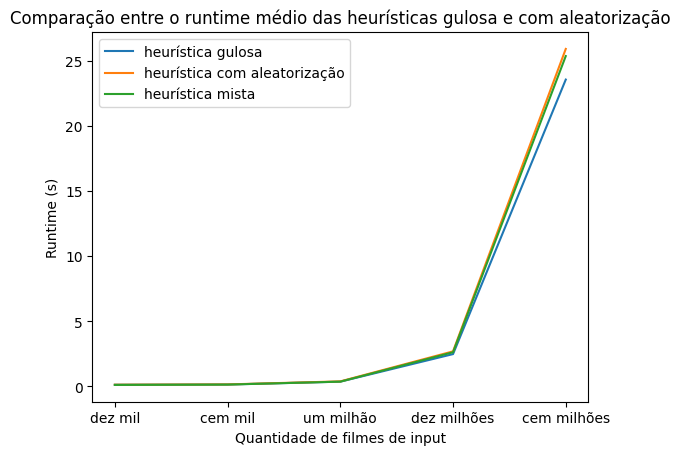

In [15]:
sns.lineplot(data=runtime_pd_guloso, x=runtime_pd_guloso.index, y='mean', label='heurística gulosa')
sns.lineplot(data=runtime_pd_aleatorizacao, x=runtime_pd_aleatorizacao.index, y='mean', label='heurística com aleatorização')
sns.lineplot(data=runtime_pd_mista, x=runtime_pd_mista.index, y='mean', label='heurística mista')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre o runtime médio das heurísticas gulosa e com aleatorização')
plt.legend()
plt.show()

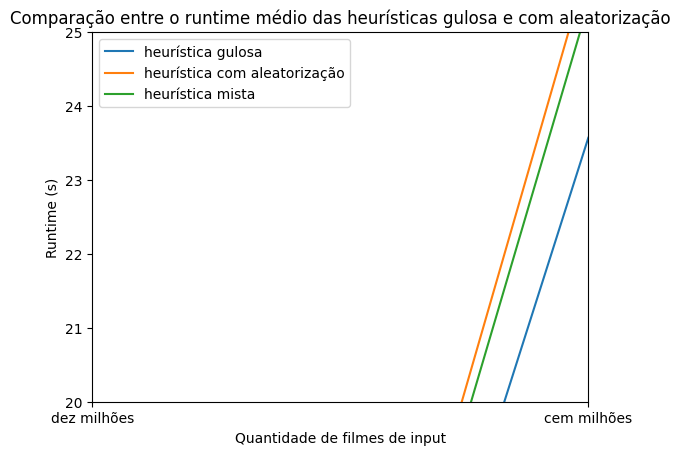

In [16]:
sns.lineplot(data=runtime_pd_guloso, x=runtime_pd_guloso.index, y='mean', label='heurística gulosa')
sns.lineplot(data=runtime_pd_aleatorizacao, x=runtime_pd_aleatorizacao.index, y='mean', label='heurística com aleatorização')
sns.lineplot(data=runtime_pd_mista, x=runtime_pd_mista.index, y='mean', label='heurística mista')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Runtime (s)')
plt.title('Comparação entre o runtime médio das heurísticas gulosa e com aleatorização')
plt.legend()
plt.axis([3, 4, 20, 25])
plt.show()

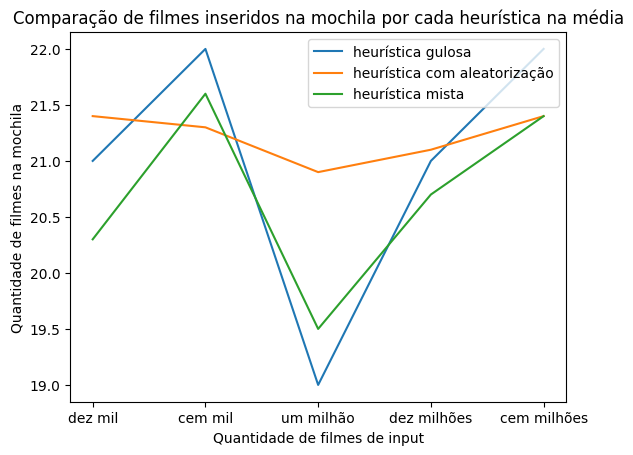

In [17]:
sns.lineplot(data=films_in_knapsack_pd_guloso, x=films_in_knapsack_pd_guloso.index, y='mean', label='heurística gulosa')
sns.lineplot(data=films_in_knapsack_pd_aleatorizacao, x=films_in_knapsack_pd_aleatorizacao.index, y='mean', label='heurística com aleatorização')
sns.lineplot(data=films_in_knapsack_pd_mista, x=films_in_knapsack_pd_mista.index, y='mean', label='heurística mista')
plt.xlabel('Quantidade de filmes de input')
plt.ylabel('Quantidade de filmes na mochila')
plt.title('Comparação de filmes inseridos na mochila por cada heurística na média')
plt.legend()
plt.show()

# Ánalise dos gráficos

Observando os gráficos de tempo de "runtime" e de preenchimento da mochila, podemos deduzir que embora a heurística gulosa tenha menor tempo de processamento, relacionando com seu menor número de chamadas no programa, ela obtem resultados mais extremos, sendo menos consistente. A gulosa, no entanto, é a mais lenta de todas, mas é mais consistente obtendo quase sempre o mesmo resultado. Por fim a heurística mista tem um ganho de perfomance marginal em comparação com a heurística aleatória, e é um pouco mais consistente que a puramente gulosa.